In [25]:
import numpy as np
import h5py
import yaml
import os
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('dark_background')


In [26]:
sub = 1
ses = 1
run_id = 7
task = 'test'

data_fn = f'{os.path.split(os.getcwd())[0]}/logs/sub-{str(sub).zfill(2)}_ses-{str(ses).zfill(1)}_task-{task}_run-{str(run_id).zfill(2)}_events.tsv'
print(data_fn)
d_df = pd.read_csv(data_fn, delimiter='\t' , index_col=0, na_values='NA')

/Users/knapen/projects/expectation_orientation/logs/sub-01_ses-1_task-test_run-07_events.tsv


In [30]:
response_df = d_df.loc[(d_df['event_type'] == 'response') & (d_df['response'] != 'space') & -d_df['response_correct'].isnull()]

<AxesSubplot:>

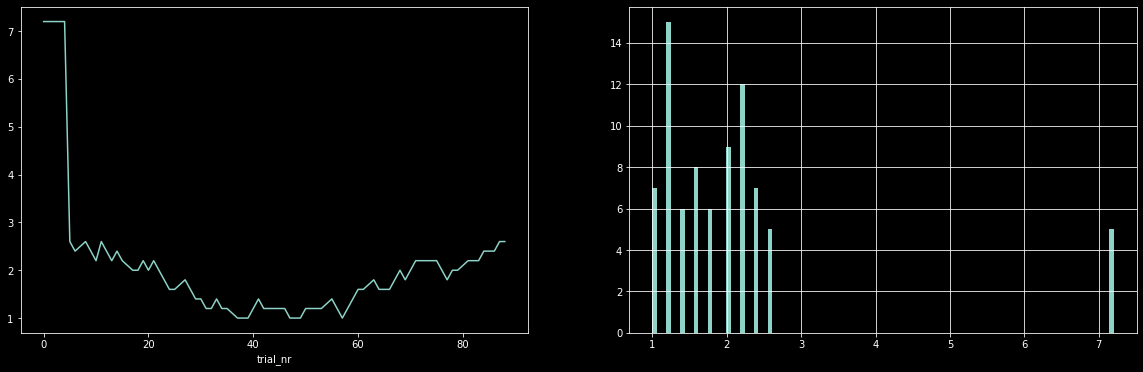

In [31]:
f, sbps = plt.subplots(1, 2, figsize=(20,6))
response_df.staircase_value.plot(ax=sbps[0])
response_df.staircase_value.hist(bins=100, ax=sbps[1])

In [32]:
response_df.groupby('staircase_value')['response_correct'].mean()

staircase_value
1.0    0.714286
1.2    0.400000
1.4    0.166667
1.6    0.625000
1.8    0.500000
2.0    0.444444
2.2    0.416667
2.4    0.428571
2.6    0.400000
7.2    0.000000
Name: response_correct, dtype: float64

In [34]:
response_df.head(40,)

,onset,event_type,phase,response,nr_frames,staircase_value,block,block_mean,block_kappa,radians,...,response_key,response_sign,response_time,response_correct,button_pressed,stim_value_p1,stim_value_p2,correct_response_sign,onset_abs,duration
trial_nr,,,,,,,,,,,,,,,,,,,,,
0,28.518117,response,3,NaN,56.0,7.2,1.0,-2.723554,0.752727,-1.399674,...,j,1.0,1.116138,0.0,NaN,-3.6,3.6,-1.0,35.151064,NaN
1,32.352041,response,3,NaN,41.0,7.2,1.0,-1.071512,3.661899,-0.596517,...,f,-1.0,0.849910,0.0,NaN,3.6,-3.6,1.0,38.984988,NaN
2,36.414224,response,3,NaN,38.0,7.2,1.0,-1.071512,3.661899,-1.031985,...,f,-1.0,0.805315,0.0,NaN,3.6,-3.6,1.0,43.047171,NaN
3,40.551551,response,3,NaN,41.0,7.2,1.0,-2.723554,0.752727,2.910557,...,j,1.0,0.850155,0.0,NaN,-3.6,3.6,-1.0,47.184498,NaN
4,44.540331,response,3,NaN,34.0,7.2,1.0,-2.723554,0.752727,3.004912,...,j,1.0,0.734477,0.0,NaN,-3.6,3.6,-1.0,51.173278,NaN
5,48.705663,response,3,NaN,38.0,2.6,1.0,-1.071512,3.661899,-1.759987,...,f,-1.0,0.801062,0.0,NaN,1.3,-1.3,1.0,55.338610,NaN
6,52.852405,response,3,NaN,41.0,2.4,1.0,-2.723554,0.752727,-0.689719,...,j,1.0,0.850476,1.0,NaN,1.2,-1.2,1.0,59.485352,NaN
8,61.005025,response,3,NaN,38.0,2.6,1.0,-1.071512,3.661899,-1.163395,...,f,-1.0,0.801982,0.0,NaN,1.3,-1.3,1.0,67.637972,NaN
9,65.069064,response,3,NaN,36.0,2.4,1.0,-2.723554,0.752727,1.915604,...,j,1.0,0.766279,0.0,NaN,-1.2,1.2,-1.0,71.702011,NaN


In [24]:
d_df.head(40,)

,onset,event_type,phase,response,nr_frames,staircase_value,block,block_mean,block_kappa,radians,...,response_key,response_sign,response_time,response_correct,button_pressed,stim_value_p1,stim_value_p2,correct_response_sign,onset_abs,duration
trial_nr,,,,,,,,,,,,,,,,,,,,,
0,0.076446,stim,0,NaN,0.0,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.504818,1.977735
0,2.022499,response,0,space,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.450871,NaN
1,2.054180,stim,0,NaN,0.0,7.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.482552,1.010316
1,3.050201,pulse,0,t,NaN,7.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.478573,NaN
1,3.064496,stim,1,NaN,0.0,7.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.492868,16.030718
0,19.095214,fix,0,NaN,59.0,7.2,1.0,-2.723554,0.752727,-1.399674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,25.523586,0.986539
0,20.081753,warning,1,NaN,29.0,7.2,1.0,-2.723554,0.752727,-1.399674,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.510125,0.524605
0,20.606358,stim,2,NaN,97.0,7.2,1.0,-2.723554,0.752727,-1.399674,...,NaN,NaN,NaN,NaN,NaN,3.6,NaN,1.0,27.034730,2.591479
0,20.731904,response,3,NaN,8.0,7.2,1.0,-2.723554,0.752727,-1.399674,...,NaN,NaN,NaN,NaN,NaN,3.6,-3.6,1.0,27.160276,NaN
